# Los Angeles Neighborhood Crime Analysis

In this data analytics project, we delve into the intricate landscape of crime in Los Angeles neighborhoods to identify the safest community for residence. Our primary focus revolves around uncovering insights to guide individuals seeking secure environments, with a particular emphasis on mitigating the risk of theft. By employing advanced analytical techniques, we aim to empower residents and prospective homebuyers with data-driven recommendations, ensuring informed decisions about their choice of neighborhood and enhancing overall safety and well-being.

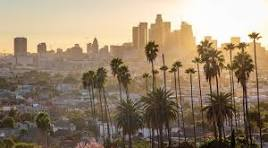

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium

In [73]:
from google.colab import drive
drive.mount('/content/drive')
crimes = pd.read_csv('/content/drive/MyDrive/crimes.csv',parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,...,Weapon Desc,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01,330,1,Central,163,624,BATTERY - SIMPLE ASSAULT,25,...,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,...,NaN,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
3,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,...,NaN,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
4,200100502,2020-01-02,2020-01-02,1315,1,Central,161,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,...,NaN,Invest Cont,442.0,998.0,NaN,NaN,700 S FIGUEROA ST,NaN,34.0483,-118.2631


After examining the data, it reveals that, among all reported crimes in Los Angeles, approximately 30% involve individuals identified as Hispanic, while around 20% involve those identified as white. It's crucial to emphasize that making sweeping conclusions about crime rates based solely on racial demographics is unwarranted. Without having access to population counts by race, any claims about Hispanics or white individuals committing the most crimes in Los Angeles lack a foundational basis and should be approached with caution.



	Victim's descent:
        A - Other Asian
        
        B - Black
        
        C - Chinese
        
        D - Cambodian
        
        F - Filipino
        
        G - Guamanian
        
        H - Hispanic/Latin/Mexican
        
        I - American Indian/Alaskan Native
        
        J - Japanese
        
        K - Korean
        
        L - Laotian
        
        O - Other
        
        P - Pacific Islander
        
        S - Samoan
        
        U - Hawaiian
        
        V - Vietnamese
        
        W - White
        
        X - Unknown
        
        Z - Asian Indian

In [74]:
crimes['Vict Descent'].fillna("X",inplace=True)
race_value_counts = crimes['Vict Descent'].value_counts(normalize=True).round(3).head(4) * 100
race_value_counts

H    30.2
X    23.2
W    20.5
B    14.2
Name: Vict Descent, dtype: float64

<Axes: >

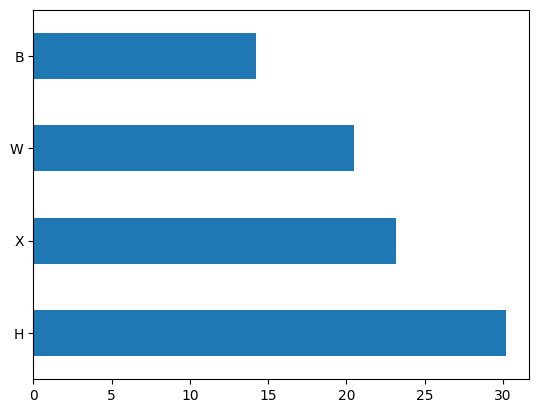

In [75]:
race_value_counts.plot(kind='barh')

Now that we've completed our preliminary data exploration, the next phase involves a meticulous data-cleaning process. Our focus will be on streamlining the dataset by removing superfluous columns. Identified columns containing null values will be excluded from our analysis, as they do not contribute pertinent information to our project objectives. This strategic data-cleaning step ensures that our subsequent analyses are based on a refined and meaningful dataset, enhancing the accuracy and reliability of our findings.

In [76]:
crimes.describe()

,DR_NO,AREA,Rpt Dist No,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,7.275390e+05,727539.000000,727539.000000,727539.000000,727539.000000,727530.000000,247290.000000,727529.000000,51131.000000,1496.000000,44.000000,727539.000000,727539.000000
mean,2.147824e+08,10.711710,1117.596408,493.366980,30.092553,301.567751,360.308431,493.172001,960.483797,982.711230,988.113636,33.970349,-117.996013
std,1.028923e+07,6.090515,609.059169,200.685346,21.862713,216.071186,126.253351,200.519152,112.393077,52.974211,32.280180,1.874138,6.499264
min,8.170000e+02,1.000000,101.000000,110.000000,-2.000000,101.000000,101.000000,110.000000,210.000000,626.000000,821.000000,0.000000,-118.667600
25%,2.021113e+08,6.000000,622.000000,330.000000,0.000000,101.000000,307.000000,330.000000,998.000000,998.000000,998.000000,34.013600,-118.429200
50%,2.119100e+08,11.000000,1142.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058300,-118.321400
75%,2.215012e+08,16.000000,1615.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.162900,-118.273900
max,2.399165e+08,21.000000,2199.000000,954.000000,120.000000,974.000000,516.000000,954.000000,999.000000,999.000000,999.000000,34.334300,0.000000


In [77]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727539 entries, 0 to 727538
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           727539 non-null  int64         
 1   Date Rptd       727539 non-null  datetime64[ns]
 2   DATE OCC        727539 non-null  datetime64[ns]
 3   TIME OCC        727539 non-null  object        
 4   AREA            727539 non-null  int64         
 5   AREA NAME       727539 non-null  object        
 6   Rpt Dist No     727539 non-null  int64         
 7   Crm Cd          727539 non-null  int64         
 8   Crm Cd Desc     727539 non-null  object        
 9   Vict Age        727539 non-null  int64         
 10  Vict Sex        629313 non-null  object        
 11  Vict Descent    727539 non-null  object        
 12  Premis Cd       727530 non-null  float64       
 13  Premis Desc     727108 non-null  object        
 14  Weapon Used Cd  247290 non-null  flo

In [78]:
crimes.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Crm Cd                 0
Crm Cd Desc            0
Vict Age               0
Vict Sex           98226
Vict Descent           0
Premis Cd              9
Premis Desc          431
Weapon Used Cd    480249
Weapon Desc       480249
Status Desc            0
Crm Cd 1              10
Crm Cd 2          676408
Crm Cd 3          726043
Crm Cd 4          727495
LOCATION               0
Cross Street      610180
LAT                    0
LON                    0
dtype: int64

In [79]:
crimes.drop(columns = crimes.columns[11:21], inplace = True)
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,LOCATION,Cross Street,LAT,LON
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01,330,1,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,700 S HILL ST,NaN,34.0459,-118.2545
2,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,5400 CORTEEN PL,NaN,34.1685,-118.4019
3,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,14400 TITUS ST,NaN,34.2198,-118.4468
4,200100502,2020-01-02,2020-01-02,1315,1,Central,161,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,700 S FIGUEROA ST,NaN,34.0483,-118.2631


After analyzing our histogram and bar plots, a noticeable trend emerges: a substantial portion of reported crimes is concentrated among individuals aged 20 to 40. This demographic appears to play a significant role in the occurrence of criminal activities. Exploring the underlying factors contributing to this age-specific prevalence could provide valuable insights for devising targeted interventions and policies aimed at reducing crime rates and enhancing community safety."

In [80]:
def age_grouping(element):
  if element >= 50:
    return "old"
  elif 35 < element < 50:
    return "middle aged"
  else:
    return "young"
crimes["AGE GROUP"] = crimes["Vict Age"].apply(age_grouping)

<Axes: >

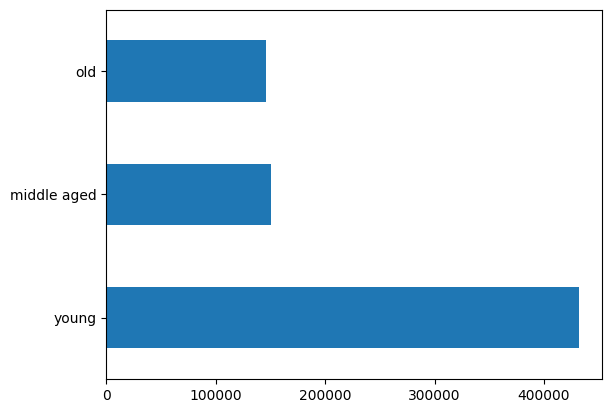

In [81]:
age_value_counts = crimes["AGE GROUP"].value_counts()
age_value_counts.plot(kind='barh')

(array([1.83488e+05, 5.29090e+04, 1.79022e+05, 1.40730e+05, 9.55710e+04,
        5.70390e+04, 1.54460e+04, 2.88600e+03, 4.47000e+02, 1.00000e+00]),
 array([ -2. ,  10.2,  22.4,  34.6,  46.8,  59. ,  71.2,  83.4,  95.6,
        107.8, 120. ]),
 <BarContainer object of 10 artists>)

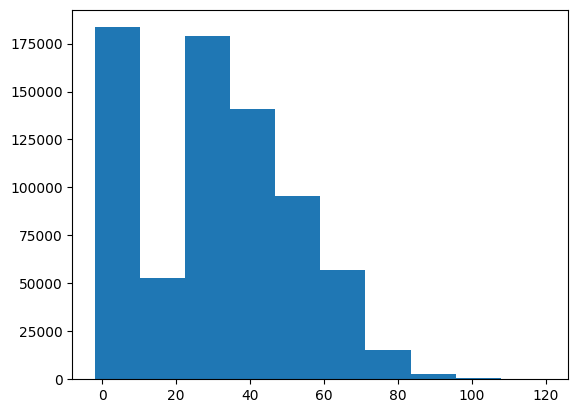

In [82]:
plt.hist(crimes["Vict Age"])

In [83]:
crimes["HOUR"] = crimes["TIME OCC"].str[:2].astype(int)
hours_value_counts = crimes["HOUR"].value_counts().sort_values(ascending=False).head(14)

Checking out when crimes happen across the whole dataset, it's clear that most of them go down between 12 PM and 8 PM. Around 50,000 crimes go down at each of these times. Knowing this hourly pattern is key for understanding what's up with criminal activities. It's a starting point to dig into what might be driving crime rates during these hours. These findings can help with figuring out strategies for law enforcement, where to put resources, and ways to keep communities safe.

<Axes: >

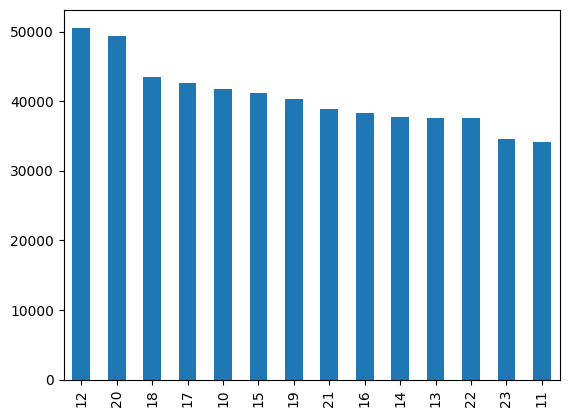

In [84]:
hours_value_counts.plot(kind='bar')

The primary objective of this project is to identify neighborhoods characterized by a high prevalence of theft. To accomplish this, we will navigate through the 'Crm Cd Desc' field, leveraging a regular expression to extract all incidents related to theft. This methodological approach is fundamental to our data analysis efforts, as it serves as a step in gaining insights into theft patterns and identifying areas with heightened vulnerability.

In [85]:
crimes["YEAR"] = crimes["DATE OCC"].dt.year

In [86]:

import re

theft_pattern = re.compile(r'\b(THEFT|BURGLARY|ROBBERY|SHOPLIFTING|BIKE - STOLEN|VEHICLE - STOLEN|PICKPOCKET|EMBEZZLEMENT|PURSE SNATCHING)\b', flags=re.I)
theft_related_rows = crimes[crimes['Crm Cd Desc'].str.contains(theft_pattern)]
theft_related_rows.head()

<ipython-input-86-cceac38b4a5e>:4: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,LOCATION,Cross Street,LAT,LON,AGE GROUP,HOUR,YEAR
4,200100502,2020-01-02,2020-01-02,1315,1,Central,161,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,700 S FIGUEROA ST,NaN,34.0483,-118.2631,young,13,2020
6,200100507,2020-01-04,2020-01-04,200,1,Central,101,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",23,M,700 BERNARD ST,NaN,34.0677,-118.2398,young,20,2020
7,201710201,2020-06-19,2020-05-26,1925,17,Devonshire,1708,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0,X,11900 BALBOA BL,NaN,34.2864,-118.5021,young,19,2020
8,200100509,2020-01-04,2020-01-04,2200,1,Central,192,330,BURGLARY FROM VEHICLE,29,M,15TH,OLIVE,34.0359,-118.2648,young,22,2020
10,200100514,2020-01-05,2020-01-05,1355,1,Central,162,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",41,M,800 S OLIVE ST,NaN,34.0452,-118.2569,middle aged,13,2020


In [87]:
theft_pivot = pd.pivot_table(data=theft_related_rows, index='AREA NAME', columns='YEAR', values='Crm Cd Desc', aggfunc='count')
theft_pivot

YEAR,2020,2021,2022,2023
AREA NAME,,,,
77th Street,5501,5620,7377,3337
Central,5490,6933,10388,4592
Devonshire,4842,5223,6011,2846
Foothill,3660,3740,4506,1781
Harbor,4244,4300,4664,2286
Hollenbeck,3869,3944,4586,2114
Hollywood,5390,6598,7130,3063
Mission,4320,4398,5127,2157
N Hollywood,5867,6411,6674,3178


<Axes: ylabel='AREA NAME'>

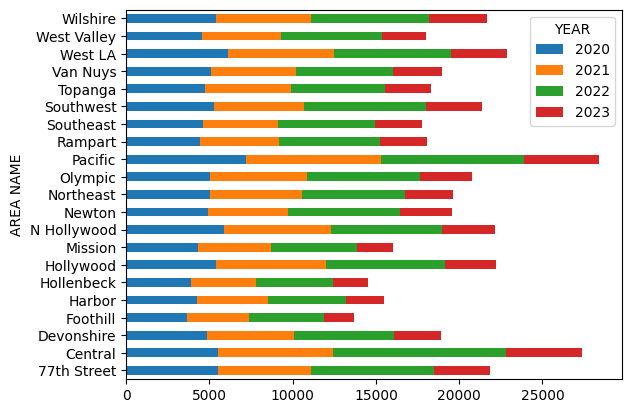

In [88]:
theft_pivot.plot(kind='barh',stacked=True)

<Axes: xlabel='YEAR', ylabel='AREA NAME'>

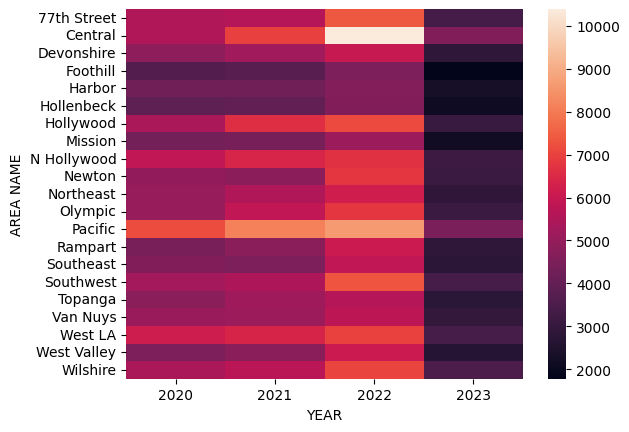

In [89]:
sns.heatmap(data=theft_pivot)



Analyzing the data on theft crimes by neighborhood for the years 2020 to 2023, we can identify neighborhoods with the least and most amount of crime. Here are the top three neighborhoods with the least amount of theft crime and the three neighborhoods with the highest amount:

# Three Neighborhoods with the Least Amount of Theft Crime:




Foothill:

          2020: 3660
          2021: 3740
          2022: 4506
          2023: 1781
Harbor:

          2020: 4244
          2021: 4300
          2022: 4664
          2023: 2286
Hollenbeck:

          2020: 3869
          2021: 3944
          2022: 4586
          2023: 2114


# Three Neighborhoods with the Highest Amount of Theft Crime:





Pacific:

          2020: 7175
          2021: 8121
          2022: 8611
          2023: 4460
West LA:

          2020: 6121
          2021: 6362
          2022: 7007
          2023: 3367
Central:

          2020: 5490
          2021: 6933
          2022: 10388
          2023: 4592



When considering the best neighborhood to live in, Foothill, Harbor, and Hollenbeck stand out as having the least amount of theft crime over the specified years. On the other hand, Pacific, West LA, and Central have consistently shown higher numbers of theft crimes. It's important to note that crime rates alone may not provide a complete picture of neighborhood livability, and other factors such as community amenities, cost of living, and personal preferences should also be considered in the decision-making process.






